#### Feature Group별 전처리 pipeline

In [110]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from PGhelper import *

/usr/local/lib/python3.5/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


##### Parameters

In [3]:
params = param_load('./params.yml')

#### Data loading

##### Feature_info loading

In [4]:
feature_info = feature_info_load('./feature_info.yml')

In [5]:
for k, v in feature_info.items():
    print("{} : {}".format(k, v))
    print(v[0])

second : ['./test2.csv', './test3.csv']
./test2.csv
basic : ['./test.csv']
./test.csv


#### Feature 전처리

##### feature 1 loading

In [6]:
df, df_dict = load_feature_group('basic', feature_info)

##### Numerical Feature Transform

In [7]:
df_dict['num_cols'] = list(df.describe().columns)

In [8]:
normal_cols, log_trns_cols, sqrt_trns_cols = transform_recom(df, df_dict['num_cols'])

In [9]:
df = log_transform(df, log_trns_cols)
df = sqrt_transform(df, sqrt_trns_cols)

##### Categorical Feature Transform

In [115]:
def cat_filter(df, max_cat_no=30, max_variance=20):
    df_type = df.apply(lambda x: str(type(x[0])).split(' ')[1][1:-2])
    df_type = pd.DataFrame(data={'colnames': list(df_type.index), 'dtype': df_type.values})
    str_cols = df_type.loc[df_type['dtype']=='str', 'colnames'].values
    cat_numbers = df[str_cols].nunique()
    cat_cols = list(cat_numbers[cat_numbers < max_cat_no].index)
    
    return df_type, str_cols, cat_numbers, cat_cols

def cat_variance_check(df, col, skew_ratio=0.2, threshold=0.8):
    a = df.groupby(col)[col].count().sort_values(ascending=False)    
    ratio = a.iloc[0:int(math.ceil(a.count() * skew_ratio))].sum() / a.sum()
    if ratio > 0.8:
        rslt = 'low'
    else:
        rslt = 'high'
    return rslt, ratio

In [57]:
df_type, str_cols, cat_numbers, cat_cols = cat_filter(df, 30, 20)

In [97]:
df_type

,colnames,dtype
0,prod_name,str
1,keyword,str
2,prod_id,int
3,review_id,int
4,review_title,str
5,prod_option,str
6,review_content,str
7,reviewer,str
8,review_date,str
9,reviewed,float


In [118]:
cat_variance_check(df, 'reviewer')

('high', 0.4684095860566449)

##### EDA: Feature 점검

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9180 entries, 0 to 9179
Data columns (total 10 columns):
prod_name         9180 non-null object
keyword           9180 non-null object
prod_id           9180 non-null int64
review_id         9180 non-null int64
review_title      9179 non-null object
prod_option       9180 non-null object
review_content    9180 non-null object
reviewer          9180 non-null object
review_date       9180 non-null object
reviewed          9180 non-null int64
dtypes: int64(3), object(7)
memory usage: 717.3+ KB


(array([ 128.,  399.,  814., 1110.,  987., 1371., 1488., 1832.,  941.,
         110.]),
 array([0.        , 0.98262825, 1.9652565 , 2.94788474, 3.93051299,
        4.91314124, 5.89576949, 6.87839774, 7.86102599, 8.84365423,
        9.82628248]),
 <a list of 10 Patch objects>)

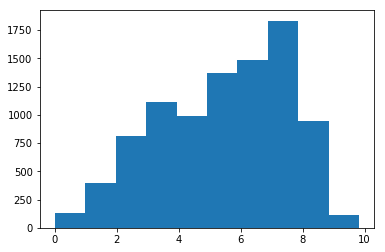

In [10]:
plt.hist(df['reviewed'])

In [9]:
df_dict

{'cols': ['prod_name',
  'keyword',
  'prod_id',
  'review_id',
  'review_title',
  'prod_option',
  'review_content',
  'reviewer',
  'review_date',
  'reviewed'],
 'num_cols': ['prod_id', 'review_id', 'reviewed'],
 'shape': (9180, 10)}